In [1]:
import numpy as np
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
%matplotlib inline

Using TensorFlow backend.


In [2]:
vgg16_model=keras.applications.vgg16.VGG16(weights='C:/Users/harshak/Desktop/harshak/vgg16_weights_tf_dim_ordering_tf_kernels.h5')

In [3]:
model=Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [4]:
for layer in model.layers:
    layer.trainable=False

In [5]:
model.add(Dense(2,activation='relu'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [6]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
train_path='D:/Kaggle/PetImages/train'
test_path='D:/Kaggle/PetImages'
valid_path='D:/Kaggle/PetImages/valid'

In [12]:
train_batches=ImageDataGenerator().flow_from_directory(
    train_path,
    target_size=(224,224),
    classes=['Dog','Cat'],
    batch_size=10
)
valid_batches=ImageDataGenerator().flow_from_directory(
    valid_path,
    target_size=(224,224),
    classes=['Dog','Cat'],
    batch_size=8
)
test_batches=ImageDataGenerator().flow_from_directory(
    train_path,
    target_size=(224,224),
    classes=['Dog','Cat'],
    batch_size=10
)

Found 42 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [13]:

model.fit_generator(train_batches,steps_per_epoch=10,validation_data=valid_batches,validation_steps=4,epochs=10,verbose=2)

Epoch 1/10
 - 2s - loss: 1.2697 - acc: 0.4593 - val_loss: 3.0449 - val_acc: 0.4062
Epoch 2/10
 - 2s - loss: 1.2665 - acc: 0.4411 - val_loss: 3.0449 - val_acc: 0.4062
Epoch 3/10
 - 2s - loss: 1.2697 - acc: 0.4593 - val_loss: 3.0449 - val_acc: 0.4062
Epoch 4/10
 - 2s - loss: 1.5564 - acc: 0.4229 - val_loss: 3.0449 - val_acc: 0.4062
Epoch 5/10
 - 2s - loss: 1.2697 - acc: 0.4593 - val_loss: 3.0449 - val_acc: 0.4062
Epoch 6/10
 - 2s - loss: 0.9767 - acc: 0.4593 - val_loss: 3.0449 - val_acc: 0.4062
Epoch 7/10
 - 2s - loss: 1.2697 - acc: 0.4593 - val_loss: 3.0449 - val_acc: 0.4062
Epoch 8/10
 - 2s - loss: 1.2665 - acc: 0.4411 - val_loss: 3.0449 - val_acc: 0.4062
Epoch 9/10
 - 2s - loss: 0.9767 - acc: 0.4593 - val_loss: 3.0449 - val_acc: 0.4062
Epoch 10/10
 - 2s - loss: 0.9767 - acc: 0.4593 - val_loss: 3.0449 - val_acc: 0.4062


In [23]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')


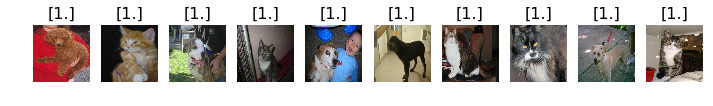

In [24]:
test_imgs,test_labels=next(test_batches)
plots(test_imgs,titles=test_labels)